In [75]:
from binance import Client
import personal_function as pf
import pandas as pd
import numpy as np
import mplfinance as mpf
from binance.enums import *
import datetime  # For datetime objects
import matplotlib.pyplot as plt

In [27]:
client=pf.client()

KlinesType ='SPOT'
symbol ='BTCUSDT'
interval = '4h' # 30m, 4h,8h,12h,3d,1w
start_date ='1 Jan 2011'
end_date = '1 Jan 2021'
#limit = 500
hist_df=pf.historical_data(client,symbol, interval, start_date, end_date, KlinesType)
hist_df.drop(columns=['Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume','Ignore'], inplace=True)

In [28]:
training_df=hist_df[0:int((hist_df.shape[0]/2))+1]
training_df.to_csv('{}_training.csv'.format(symbol))
test_df=hist_df[int((hist_df.shape[0]/2))+1:]
test_df.to_csv('{}_test.csv'.format(symbol))

In [29]:
training_df

,Open Time,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4349.99,4261.32,4349.99,82.088865
1,2017-08-17 08:00:00,4333.32,4485.39,4333.32,4427.30,63.619882
2,2017-08-17 12:00:00,4436.06,4485.39,4333.42,4352.34,174.562001
3,2017-08-17 16:00:00,4352.33,4354.84,4200.74,4325.23,225.109716
4,2017-08-17 20:00:00,4307.56,4369.69,4258.56,4285.08,249.769913
...,...,...,...,...,...,...
3686,2019-04-25 16:00:00,5432.00,5491.84,5425.94,5468.38,5320.714827
3687,2019-04-25 20:00:00,5469.00,5482.14,5102.00,5219.90,24022.814682
3688,2019-04-26 00:00:00,5220.47,5510.00,5161.62,5344.39,17302.114223
3689,2019-04-26 04:00:00,5342.90,5387.92,5271.00,5293.36,7277.826679


In [30]:
smoothing=2
multiplier_26=2/(26+1)
multiplier_12=2/(12+1)
multiplier_9=2/(9+1)

In [31]:
training_df['26-EMA']=''
training_df['26-EMA'][0:25+1]=float('NaN')
training_df['26-EMA'][26]=training_df['Close'][0:25+1].mean()
training_df[24:30]

C:\Users\truon\AppData\Local\Temp\ipykernel_24052\3033502396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['26-EMA']=''
C:\Users\truon\AppData\Local\Temp\ipykernel_24052\3033502396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['26-EMA'][0:25+1]=float('NaN')
C:\Users\truon\AppData\Local\Temp\ipykernel_24052\3033502396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,Open Time,Open,High,Low,Close,Volume,26-EMA
24,2017-08-21 04:00:00,4079.26,4104.68,3953.40,4043.63,222.575129,NaN
25,2017-08-21 08:00:00,4043.63,4088.12,4000.01,4023.11,78.878314,NaN
26,2017-08-21 12:00:00,4023.11,4023.11,3911.79,4022.00,43.762796,4167.561923
27,2017-08-21 16:00:00,4005.99,4042.11,3918.80,4027.05,24.466930,
28,2017-08-21 20:00:00,4027.05,4070.49,3950.00,4016.00,101.221748,
29,2017-08-22 00:00:00,4016.00,4016.00,3688.97,3862.39,114.685346,


In [32]:
for i in range(27,training_df.shape[0]):
    training_df['26-EMA'][i]= training_df['Close'][i]*multiplier_26 + training_df['26-EMA'][i-1]*(1-multiplier_26)

C:\Users\truon\AppData\Local\Temp\ipykernel_24052\1326278768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['26-EMA'][i]= training_df['Close'][i]*multiplier_26 + training_df['26-EMA'][i-1]*(1-multiplier_26)


In [33]:
training_df['12-EMA']=''
training_df['12-EMA'][0:12+1]=float('NaN')
training_df['12-EMA'][12]=training_df['Close'][0:12+1].mean()


C:\Users\truon\AppData\Local\Temp\ipykernel_24052\382088764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['12-EMA']=''
C:\Users\truon\AppData\Local\Temp\ipykernel_24052\382088764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['12-EMA'][0:12+1]=float('NaN')
C:\Users\truon\AppData\Local\Temp\ipykernel_24052\382088764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [34]:
for i in range(12+1,training_df.shape[0]):
    training_df['12-EMA'][i]= training_df['Close'][i]*multiplier_12 + training_df['12-EMA'][i-1]*(1-multiplier_12)

C:\Users\truon\AppData\Local\Temp\ipykernel_24052\3670063043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['12-EMA'][i]= training_df['Close'][i]*multiplier_12 + training_df['12-EMA'][i-1]*(1-multiplier_12)


In [35]:
#shift because we use close day which can be only be available at the end of the current section (the begin of the next section)
training_df['26-EMA']=training_df['26-EMA'].shift()
training_df['12-EMA']=training_df['12-EMA'].shift()

C:\Users\truon\AppData\Local\Temp\ipykernel_24052\227777614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['26-EMA']=training_df['26-EMA'].shift()
C:\Users\truon\AppData\Local\Temp\ipykernel_24052\227777614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['12-EMA']=training_df['12-EMA'].shift()


In [36]:
#training_df=training_df.dropna()

In [37]:
training_df['MACD']=training_df['12-EMA']-training_df['26-EMA']

C:\Users\truon\AppData\Local\Temp\ipykernel_24052\2067549171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['MACD']=training_df['12-EMA']-training_df['26-EMA']


In [38]:
training_df.head()

,Open Time,Open,High,Low,Close,Volume,26-EMA,12-EMA,MACD
0,2017-08-17 04:00:00,4261.48,4349.99,4261.32,4349.99,82.088865,NaN,NaN,NaN
1,2017-08-17 08:00:00,4333.32,4485.39,4333.32,4427.30,63.619882,NaN,NaN,NaN
2,2017-08-17 12:00:00,4436.06,4485.39,4333.42,4352.34,174.562001,NaN,NaN,NaN
3,2017-08-17 16:00:00,4352.33,4354.84,4200.74,4325.23,225.109716,NaN,NaN,NaN
4,2017-08-17 20:00:00,4307.56,4369.69,4258.56,4285.08,249.769913,NaN,NaN,NaN


In [57]:
training_df['Signal']=''
training_df['Signal'][0:27+9+1]=float('NaN')
training_df['Signal'][27+9+1]=training_df['MACD'][27:27+9+1].mean()
for i in range(27+9+1+1,training_df.shape[0]):
    training_df['Signal'][i]= training_df['MACD'][i]*multiplier_9 + training_df['Signal'][i-1]*(1-multiplier_9)

C:\Users\truon\AppData\Local\Temp\ipykernel_24052\1554478785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['Signal']=''
C:\Users\truon\AppData\Local\Temp\ipykernel_24052\1554478785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['Signal'][0:27+9+1]=float('NaN')
C:\Users\truon\AppData\Local\Temp\ipykernel_24052\1554478785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [99]:
training_df['True Range']=''
training_df['True Range'][0]=float('NaN')
for i in range (1,training_df.shape[0]):
    training_df['True Range'][i]=max((training_df['High'][i]-training_df['Low'][i]),abs(training_df['High'][i]-training_df['Close'][i-1]),abs(training_df['Low'][i]-training_df['Close'][i-1]))

C:\Users\truon\AppData\Local\Temp\ipykernel_24052\3137745398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['True Range']=''
C:\Users\truon\AppData\Local\Temp\ipykernel_24052\3137745398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['True Range'][0]=float('NaN')
C:\Users\truon\AppData\Local\Temp\ipykernel_24052\3137745398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [102]:
training_df['Average True Range']=training_df['True Range'].rolling(window=14).mean().shift()

C:\Users\truon\AppData\Local\Temp\ipykernel_24052\739417095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['Average True Range']=training_df['True Range'].rolling(window=14).mean().shift()


In [113]:
training_df

,Open Time,Open,High,Low,Close,Volume,26-EMA,12-EMA,MACD,Signal,Buy Signal,Sell Signal,30-SMA,10-SMA,Direction,True Range,Average True Range
0,2017-08-17 04:00:00,4261.48,4349.99,4261.32,4349.99,82.088865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-17 08:00:00,4333.32,4485.39,4333.32,4427.30,63.619882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.07,NaN
2,2017-08-17 12:00:00,4436.06,4485.39,4333.42,4352.34,174.562001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.97,NaN
3,2017-08-17 16:00:00,4352.33,4354.84,4200.74,4325.23,225.109716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.1,NaN
4,2017-08-17 20:00:00,4307.56,4369.69,4258.56,4285.08,249.769913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,2019-04-25 16:00:00,5432.00,5491.84,5425.94,5468.38,5320.714827,5391.313462,5425.078288,33.764826,44.329456,NaN,NaN,5371.237000,5427.167,-55.930000,65.9,87.675714
3687,2019-04-25 20:00:00,5469.00,5482.14,5102.00,5219.90,24022.814682,5397.022094,5431.74009,34.717995,42.407164,NaN,NaN,5377.006667,5420.873,-43.866333,380.14,86.252143
3688,2019-04-26 00:00:00,5220.47,5510.00,5161.62,5344.39,17302.114223,5383.901939,5399.149307,15.247368,36.975205,NaN,NaN,5374.612333,5400.704,-26.091667,348.38,109.338571
3689,2019-04-26 04:00:00,5342.90,5387.92,5271.00,5293.36,7277.826679,5380.975129,5390.724798,9.749669,31.530098,NaN,NaN,5375.996333,5396.634,-20.637667,116.92,128.991429


In [141]:
def buy_sell(training_df):
    sigPriceBuy=[]
    sigPriceSell=[]
    flag=-1

    for i in range(1,training_df.shape[0]):
        if training_df['MACD'][i]>training_df['Signal'][i] and flag != 1:
            sigPriceBuy.append(training_df['Close'][i])
            sigPriceSell.append(np.nan)
            flag = 1
        
        elif ((training_df['Close'][i]-3*training_df['Average True Range'][i])<training_df['Close'][i-1]) and flag != 0:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(training_df['Close'][i])
            flag = 0
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return(sigPriceBuy, sigPriceSell)

In [142]:
buy_sell = buy_sell(training_df)
training_df['Buy Signal'][0]=float('NaN')
training_df['Sell Signal'][0]=float('NaN')
training_df['Buy Signal'][1:] = buy_sell[0]
training_df['Sell Signal'][1:] = buy_sell[1]

C:\Users\truon\AppData\Local\Temp\ipykernel_24052\1445491222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['Buy Signal'][0]=float('NaN')
C:\Users\truon\AppData\Local\Temp\ipykernel_24052\1445491222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['Sell Signal'][0]=float('NaN')
C:\Users\truon\AppData\Local\Temp\ipykernel_24052\1445491222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['Bu

In [132]:
training_df

,Open Time,Open,High,Low,Close,Volume,26-EMA,12-EMA,MACD,Signal,Buy Signal,Sell Signal,30-SMA,10-SMA,Direction,True Range,Average True Range
0,2017-08-17 04:00:00,4261.48,4349.99,4261.32,4349.99,82.088865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-17 08:00:00,4333.32,4485.39,4333.32,4427.30,63.619882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.07,NaN
2,2017-08-17 12:00:00,4436.06,4485.39,4333.42,4352.34,174.562001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.97,NaN
3,2017-08-17 16:00:00,4352.33,4354.84,4200.74,4325.23,225.109716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.1,NaN
4,2017-08-17 20:00:00,4307.56,4369.69,4258.56,4285.08,249.769913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,2019-04-25 16:00:00,5432.00,5491.84,5425.94,5468.38,5320.714827,5391.313462,5425.078288,33.764826,44.329456,NaN,NaN,5371.237000,5427.167,-55.930000,65.9,87.675714
3687,2019-04-25 20:00:00,5469.00,5482.14,5102.00,5219.90,24022.814682,5397.022094,5431.74009,34.717995,42.407164,NaN,NaN,5377.006667,5420.873,-43.866333,380.14,86.252143
3688,2019-04-26 00:00:00,5220.47,5510.00,5161.62,5344.39,17302.114223,5383.901939,5399.149307,15.247368,36.975205,NaN,NaN,5374.612333,5400.704,-26.091667,348.38,109.338571
3689,2019-04-26 04:00:00,5342.90,5387.92,5271.00,5293.36,7277.826679,5380.975129,5390.724798,9.749669,31.530098,NaN,NaN,5375.996333,5396.634,-20.637667,116.92,128.991429


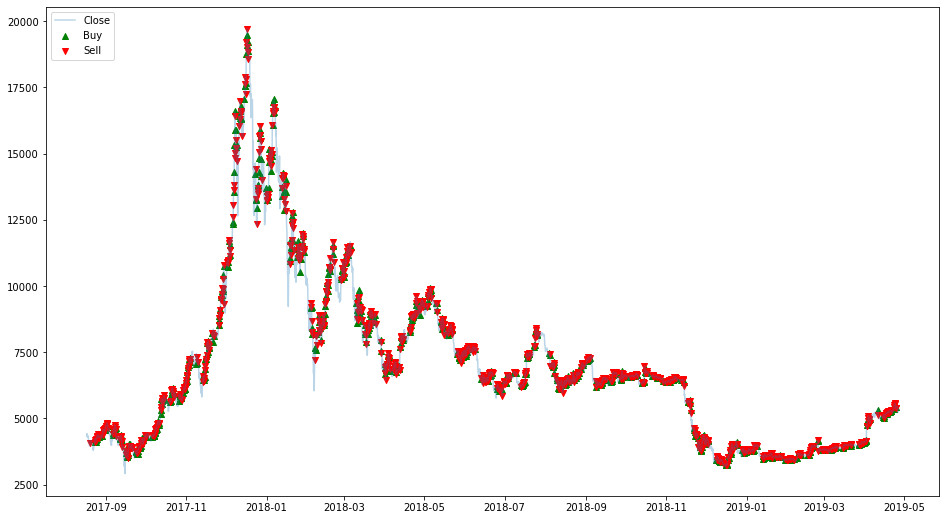

In [145]:
plt.figure(figsize=(16, 9))
plt.plot(training_df['Open Time'],training_df['Close'], label='Close', alpha=0.3)
plt.scatter(training_df['Open Time'], training_df['Buy Signal'],
            label='Buy', marker='^', color='green')
plt.scatter(training_df['Open Time'], training_df['Sell Signal'],
            label='Sell', marker='v', color='red')
plt.legend(loc='upper left')